Step 1: Import Packages required for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2: Import the CSV created through webscrapping as a DataFrame

In [406]:
df1 = pd.read_csv("Indeed_test.csv",encoding="utf-8")



Step 3: Location data

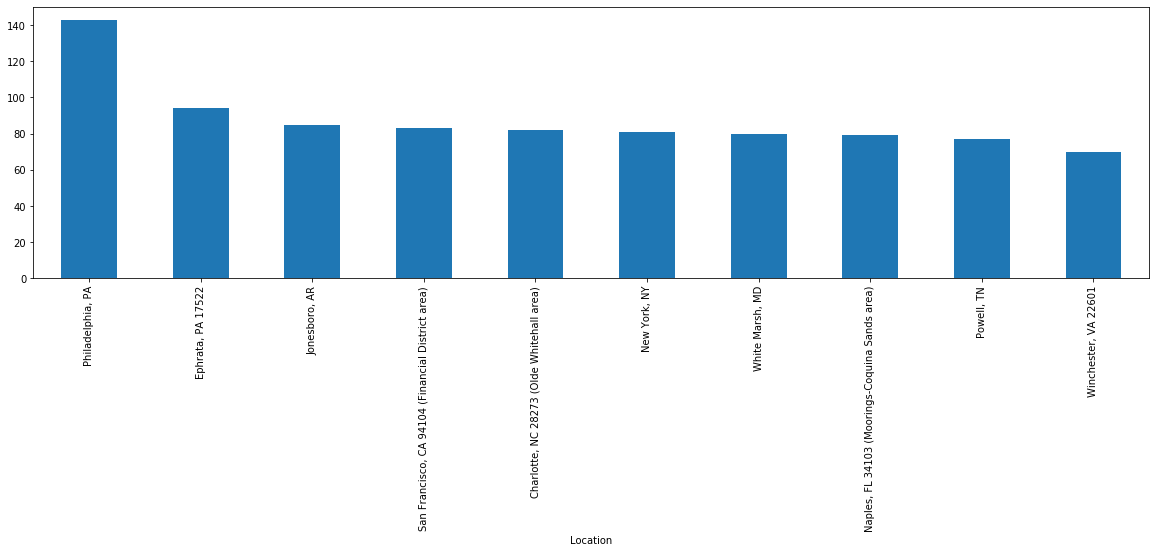

In [424]:
loc_counts1 = df1.groupby("Location").count()["Job_Title"].sort_values(ascending=False)[:10]
loc_counts1.plot(kind='bar',figsize=(20,5))
## This looks weird considering NY was considered one of the most affected areas
df2 = df1.drop_duplicates()
## created new DataFrame to get rid of any duplicate posts

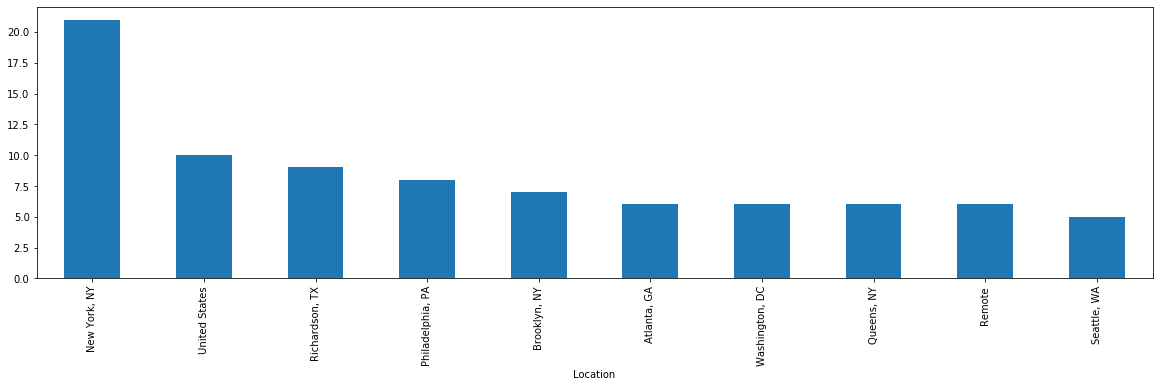

In [422]:
loc_counts2 = df2.groupby("Location").count()["Job_Title"].sort_values(ascending=False)[:10]
loc_counts2.plot(kind='bar',figsize=(20,5))
## This looks much more accurate

Step 4: Company data

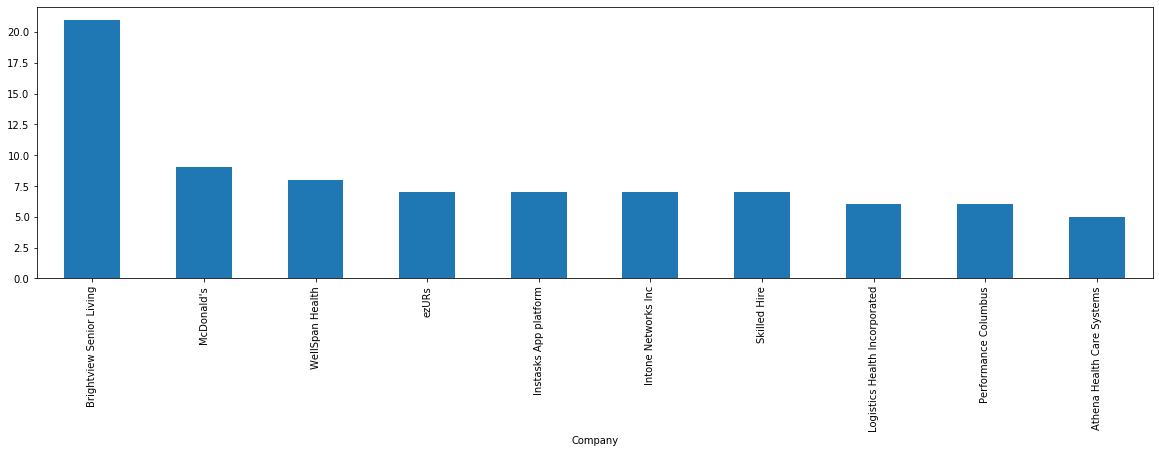

In [230]:
Company_counts2 = df2.groupby("Company").count()["Job_Title"].sort_values(ascending=False)[:10]
Company_counts2.plot(kind='bar',figsize=(20,5))

Step 5: Job-Title data

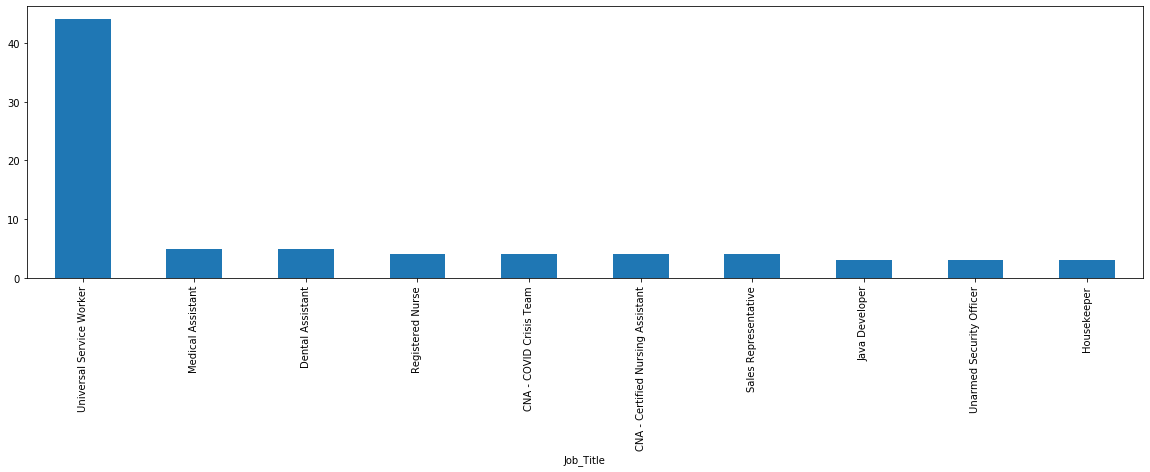

In [228]:
Title_count2 = df2.groupby("Job_Title").count()["Location"].sort_values(ascending=False)[:10]
Title_count2.plot(kind='bar',figsize=(20,5))

Step 6: Salary Data

In [421]:
Salary_count1 = df2.groupby("Salary").count()["Location"].sort_values(ascending=False)[:20]
Salary_count1
## There is a lot of variance in the data ie. "an hour", "a month", "a week"

Salary
$20 an hour            8
$18 an hour            7
$16 an hour            7
$80 an hour            6
$13 - $15 an hour      6
$9 - $11 an hour ++    5
$35 an hour            5
$12 an hour            5
$18 - $20 an hour      5
$13 an hour            5
$12 - $13 an hour      5
$14 an hour            5
$14 - $17 an hour      4
$15 an hour            4
$15 - $17 an hour      4
$70 an hour            4
$2,500 a month         4
$15 - $20 an hour      4
$50 an hour            4
$10 an hour            4
Name: Location, dtype: int64

In [401]:
## first get rid of any missing data
Salary_NA = df2['Salary'].dropna()
# create two lists, one for max salary and the other for min salary (since many salaries are "x - y an hour")
max_salary = []
min_salary = []
## Create a for loop to go through all rows in Salary_NA
for row in Salary_NA:
    index = 0
    
## if row has a '-' in it, will split and apply each slice to eith min or max.
    if "-" in row:
        try:
            split = Salary_NA.str.split('-')
            salary_min = split.loc[index][0]
            salary_max = split.loc[index][1]
        except:
            print(row)
    else:
        salary_min = row
        salary_max = row

 ## clean the data - get rid of all characters that cannot be changed to int       
    salary_min1 = salary_min.replace("a month",'').replace("a year",'').replace("an hour",'').replace("a week",'').replace("a day",'').replace('$','').replace('Up to','').replace('From','').replace(' ','').replace('++','').replace(',','')
   
    salary_max1 = salary_max.replace("a month",'').replace("a year",'').replace("an hour",'').replace("a week",'').replace("a day",'').replace('$','').replace('Up to','').replace('From','').replace(' ','').replace('++','').replace(',','')
    
## Change the numbers to salary (per year) 
    if "month" in row:
        try:
            salary_min1 = float(salary_min1)*12
            
            salary_max1 = float(salary_max1)*12
        except Exception as e:
            print(e)
            
        
    if "hour" in row:
        try:
            salary_min1 = float(salary_min1)*2080
            
            salary_max1 = float(salary_max1)*2080
            
            max_salary.append(salary_max1)
            min_salary.append(salary_min1)
            
            
        except Exception as e:
            print(e)
            index +=1

## create an empty dictionary to input lists and then convert it to a DataFrame
Salary_dict = {}
Salary_dict['Salary_Min'] = min_salary
Salary_dict['Salary_Max'] = max_salary
Salary_min_max = pd.DataFrame.from_dict(Salary_dict)    
        
Salary_min= Salary_min_max['Salary_Min'] 
Salary_max = Salary_min_max['Salary_Max']

## calculate the salary min,max and, averages of min and max
print((Salary_min.min()) ,'is the minimum salary a year')
print((Salary_min.mean()) ,'is the average minimum salary a year')
print((Salary_max.max()) ,'is the maximum salary a year')
print((Salary_max.mean()) ,'is the average maximum salary a year')

17680.0 is the minimum salary a year
39564.103151862466 is the average minimum salary a year
176800.0 is the maximum salary a year
42377.16905444126 is the average maximum salary a year
